Ejemplo de regresión lineal

## 1.- Importar las librerias necesarias para el procesamiento de los datos

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

## Cargamos los datos del dataset Boston

In [187]:
boston = datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [188]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [189]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [190]:
print(boston.data.shape)

(506, 13)


In [191]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


#### Unicamente tomaremos los datos del numero de habitaciones (RM)
#### El numero de cuartos se encuentra en la columna 5, recuerden que el conteo comienza desde cero.

## 3.- Selección de las variables dependiente e independiente

In [192]:
df_boston=pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [193]:
df_boston[(df_boston["RM"]<=4.5)&(df_boston.target<30)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
374,18.49820,0.0,18.1,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
384,20.08490,0.0,18.1,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8
406,20.71620,0.0,18.1,0.0,0.659,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34,11.9


In [194]:
df_boston=df_boston.drop([365, 367, 374, 384, 406 ],axis=0)

In [195]:
X = df_boston['RM']
# Y seran los datos de las etiquetas
y = df_boston.target

## 4.- Grafica de dispersión de los datos

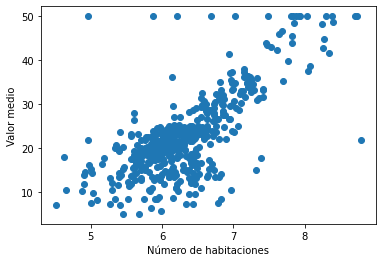

In [196]:
#Colocamos los valores de cada variable
plt.scatter(X,y)
#Asignamos nombre al eje "X"
plt.xlabel("Número de habitaciones")
#Asignamos nombre al eje "Y"
plt.ylabel("Valor medio")
#Mostramos los valores de la grafica
plt.show()

### Implementacion de regresion simple

4.- Selección de los conjuntos de entrenamiento y prueba 

In [197]:
#Importamos el metodo train_test_split
from sklearn.model_selection import train_test_split

In [198]:
X_num=pd.DataFrame(X).to_numpy()
y_num=pd.DataFrame(y).to_numpy()

In [199]:
X_num.shape

(501, 1)

In [200]:
#Elegimos aleatoriamente los valores, usando sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

5.- Creación del modelo

In [201]:
y_num=y_num.reshape((len(y),1))

In [202]:
X_num.shape

(501, 1)

In [203]:
#Creando el objeto de modelado
lr=linear_model.LinearRegression()

#Formateando los datos
#X_train=np.reshape(X_test,(-1,1))
#y_train=np.reshape(y_test,(-1,1))

In [204]:
#Entrenando al modelo
lr.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[7.016 5.627 6.273 7.802 6.101 6.041 5.876 6.77  7.241 6.251 5.036 6.152
 7.024 6.092 8.247 6.195 5.67  5.885 6.575 7.327 5.572 6.12  6.405 5.531
 5.403 6.631 6.794 6.144 5.983 6.618 7.831 6.436 6.434 5.705 5.453 6.545
 6.405 6.678 6.727 6.229 7.393 7.691 6.98  5.707 5.942 8.337 5.87  7.853
 6.382 6.968 5.628 6.335 6.874 7.52  6.373 5.701 5.874 7.82  6.433 6.417
 5.891 7.765 5.713 8.297 5.888 6.739 6.316 6.152 5.841 5.869 7.007 7.923
 5.807 7.185 5.565 6.012 5.887 4.906 5.713 6.176 5.983 6.015 6.398 5.604
 6.297 6.474 5.594 6.495 5.976 6.209 6.009 6.861 6.38  6.266 5.79  6.552
 6.326 6.516 6.749 5.836 5.981 6.943 6.852 5.637 6.556 6.975 6.411 6.726
 5.852 5.605 6.849 6.095 6.812 6.595 6.495 5.856 6.122 4.97  5.727 5.961
 6.701 5.631 5.39  6.096 5.813 5.924 6.957 6.437 6.442 6.456 5.404 6.003
 5.872 5.412 4.963 5.304 5.782 6.426 5.304 6.211 6.968 8.034 5.926 5.757
 6.431 6.49  6.471 6.406 6.395 7.47  5.935 7.645 6.728 7.185 5.837 6.065
 5.593 6.03  6.127 5.362 7.135 6.416 5.927 6.108 5.683 6.405 5.708 5.928
 7.104 5.56  5.966 6.59  6.021 5.759 6.513 6.826 6.242 6.341 4.903 5.875
 6.417 5.859 7.61  5.536 6.75  7.147 6.482 6.718 5.569 6.009 6.185 5.85
 5.871 6.047 6.24  6.461 6.459 6.642 6.25  6.254 7.061 6.86  6.219 8.04
 5.965 8.069 6.162 6.431 6.302 6.03  6.549 6.13  6.115 7.416 5.834 5.905
 6.193 6.315 5.709 6.31  5.88  8.266 5.787 6.579 8.78  5.454 6.23  6.781
 6.226 7.236 5.706 5.617 6.249 6.153 7.163 6.824 7.178 6.142 5.868 5.741
 5.898 6.145 6.326 5.95  5.986 5.663 6.715 6.758 5.731 6.223 6.376 6.604
 6.625 6.211 7.313 5.093 6.29  6.167 6.286 6.14  6.951 6.98  6.616 6.014
 5.344 5.427 6.229 5.713 6.372 5.998 6.63  6.635 6.563 5.404 6.629 6.538
 6.208 5.468 6.051 6.655 7.82  6.185 6.023 7.489 6.8   6.63  6.193 6.383
 6.854 6.064 7.107 6.816 5.972 6.649 5.878 6.232 6.096 6.108 6.162 6.066
 6.343 4.926 6.114 7.875 6.525 7.079 5.599 7.088 6.939 7.249 7.014 7.358
 6.897 5.786 5.96  5.    6.976 5.895 5.961 6.833 6.696 5.272 5.936 5.747
 5.987 5.926 6.567 6.027 4.652 6.333 5.803 7.274 5.602 6.086 5.933 5.019
 7.041 8.259 6.879 6.421 4.519 5.783 6.317 6.376 6.121 5.875 6.606 5.914
 6.319 6.209 6.683 5.682 4.88  5.762 5.935 5.155 6.279 6.951 5.52  4.973
 6.375 6.635 6.127 6.619 6.031 7.412 6.998 6.127 7.686 5.957 6.481 5.949
 6.216 6.43  6.982 6.229 6.163 6.871 6.164 6.006 6.113 5.857 5.99  6.069
 6.174 5.856 5.896 8.375 5.877 5.951 6.425 5.757 8.725 5.794 6.081 7.929
 6.072 6.728 6.393 6.51 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
Y_pred=lr.predict(X_test)

6.- Graficando los datos ya procesados

In [ ]:
#Colomamos los valores de "X" y "Y"
plt.scatter(X_train, y_train)
#Color y tamaño de la linea
plt.plot(X_test,Y_pred,color='red',linewidth=2)
#Colocamos el titulo de la tabla
plt.title("Gráfica de Regresión Lineal Simple")
#Asignamos nombre al eje "X"
plt.xlabel("Número de habitaciones")
#Asignamos valor al eje "Y"
plt.ylabel("Valor medio del edificio")
#Mostramos la grafica
plt.show()

In [ ]:
print("DATOS DEL MODELO")
print()
print('Valor de la pendiente o del coeficiente "a"')
print(lr.coef_)
print()
print('Valor de la interseccion o del coeficiente "b"')
print(lr.intercept_)
print()
print("La ecuacion del modelo es igual a")
print('y= ',lr.coef_, 'X= ',lr.intercept_)

In [ ]:
print('Presición del modelo')
print(lr.score(X_train, y_train))